Installare le due librerie indicate sotto

In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import json
import cdlib                 # pip install cdlib #
from cdlib import evaluation
from cdlib import algorithms
from cdlib import viz
from cdlib import ensemble
from cdlib import readwrite
import pickle
import pquality             # pip install pquality #
import matplotlib.pyplot as plt
%matplotlib inline
from nf1 import NF1

Note: to be able to use all crisp methods, you need to install some additional packages:  {'wurlitzer', 'graph_tool'}
Note: to be able to use all bipartite methods, you need to install some additional packages:  {'wurlitzer'}


In [2]:
path = "../Dataset FFF/"

In [3]:
path_graph = '../Dataset FFF/Graph_data/'

In [4]:
G = nx.read_graphml(path_graph+"Real_Network.graphml")

In [5]:
community_path = "../Dataset FFF/Community_task/"

In [6]:
#Da utilizzare per i confronti
def scatter_plot(sizes, title):
    fig = plt.figure(figsize=(16,8), dpi= 150)
    ax = fig.add_subplot(111)

   
    labels = []
    for i in sizes:
        plt.scatter(i[0], i[1], alpha=0.5)
        labels.append(i[2])
    
    
    
    fontsize = 15
    
    #plt.yticks(ticks=y_list, labels=y_list, fontsize=fontsize, alpha=.7)
    plt.yticks(fontsize=fontsize, alpha=1)
    plt.xticks(fontsize=fontsize, alpha=1)
    plt.xlabel("Size", fontsize=fontsize)
    plt.ylabel("Internal Edge Density", fontsize=fontsize)
    plt.title(title + " Scatter Plot", fontsize=fontsize)
    plt.legend(labels,fontsize=fontsize)
    plt.grid(axis='both', alpha=.3)
    plt.xscale("log")
    plt.yscale("linear")
    
    #for i, v in enumerate(df[feature_2].values.tolist()):
        #ax.text(i-0.4, v+6, str(v))
    
    #ax.yaxis.set_major_formatter(FormatStrFormatter('%.6f'))
    
    # Remove borders
    plt.gca().spines["top"].set_alpha(0.0)    
    plt.gca().spines["bottom"].set_alpha(0.3)
    plt.gca().spines["right"].set_alpha(0.0)    
    plt.gca().spines["left"].set_alpha(0.3)   
    plt.show()

In [7]:
#Per plottare le communities per dimensione
def plot_communities_dimentions(coms):
    myd = {}
    for t in coms:
        lunghezza = len(t)

        if str(lunghezza) in myd:
            myd[str(lunghezza)] = myd[str(lunghezza)] + 1
        else:
            myd[str(lunghezza)] = 1

    print(myd)
    plt.figure(figsize=(20,5))
    plt.bar(myd.keys(), myd.values(), color='b')

In [8]:
def print_bold_str(s):
    return "\033[1m" + s + "\033[0m"

# 7 - Analisi delle communities di Louvain

1) Prova edit distance con supervisione tag

In [9]:
from collections import Counter
from wordcloud import WordCloud

In [10]:
saved_path2 = "../Dataset FFF/nodes_tagged.csv"

In [11]:
tagged_dg = pd.read_csv(saved_path2)

In [12]:
s_tag = tagged_dg[tagged_dg["Named"]!="unamed"][["Id", "Named"]]
s_tag

,Id,Named
0,fridaysforfuture,#FridayForFuture
1,climatestrike,Action
2,climateaction,Action
3,climatecrisis,#FridayForFuture
4,climatechange,#FridayForFuture
...,...,...
10327,weilfffdichliebt,#FridayForFuture
10337,klimapower,FFF DE
10343,klimakommunikation,FFF DE
10359,euklimakonferenz,FFF DE


In [13]:
def edit_distance(s1, s2):
    m=len(s1)+1
    n=len(s2)+1

    tbl = {}
    for i in range(m): tbl[i,0]=i
    for j in range(n): tbl[0,j]=j
    for i in range(1, m):
        for j in range(1, n):
            cost = 0 if s1[i-1] == s2[j-1] else 1
            tbl[i,j] = min(tbl[i, j-1]+1, tbl[i-1, j]+1, tbl[i-1, j-1]+cost)

    return tbl[i,j]

In [24]:
with open(community_path+'louvain.pickle', 'wb') as f:
    pickle.dump(louvain_coms, f)

In [25]:
dd = {}

In [26]:
categories_list = []
for s in louvain_coms.communities[1]:
    category = ""
    maxmax_ = 30
    for n in set(s_tag["Named"]):
        to_check = list(s_tag[s_tag["Named"]==n]["Id"])
        max_ = 30
        for ss in to_check:
            edit = edit_distance(s, ss)
            if  edit < max_:
                max_ = edit
        if max_ < maxmax_:
            maxmax_ = max_
            category = n
    categories_list.append(category)

In [27]:
new_new_df = pd.DataFrame({"Com_1": categories_list})
new_new_df.to_csv(community_path + "Com_1.csv", index=False)

In [28]:
dd[1]=categories_list

In [29]:
dd[1]

['Material',
 'FFF DE',
 'FFF DE',
 'German politics',
 'German politics',
 'FFF DE',
 'DE Actions',
 'FFF DE',
 'German politics',
 'Material',
 'FFF DE',
 'FFF DE',
 'FFF DE',
 'Action',
 'FFF DE',
 'German politics',
 'Action',
 'German politics',
 'FFF DE',
 'German politics',
 'German politics',
 'German politics',
 'German politics',
 'Material',
 'Covid',
 'German politics',
 '#FridayForFuture',
 'Material',
 'German politics',
 '#FridayForFuture',
 'FFF DE',
 'FFF DE',
 'German politics',
 'German politics',
 'Agreement',
 'Action',
 'FFF DE',
 '#FridayForFuture',
 '#FridayForFuture',
 '#FridayForFuture',
 'FFF DE',
 'FFF DE',
 'Material',
 '#FridayForFuture',
 'FFF DE',
 'German politics',
 'FFF DE',
 'Action',
 '#FridayForFuture',
 '#FridayForFuture',
 '#FridayForFuture',
 'DE Actions',
 'Covid',
 '#FridayForFuture',
 'DE Actions',
 'Greta Thunberg',
 'German politics',
 'German politics',
 'German politics',
 'German politics',
 'DE Actions',
 'Agreement',
 'Greta Thunberg',

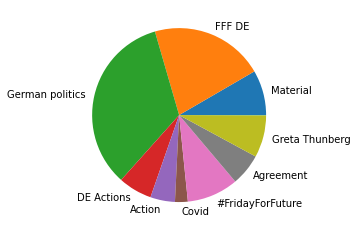

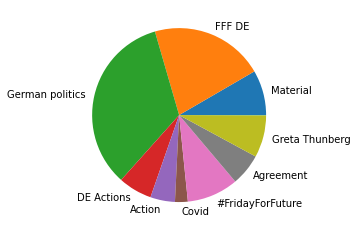

In [30]:
import matplotlib.pyplot as pyplot

for i in range(2):
    all_string = ""
    for s in dd[1]:
        all_string = all_string + s + "_"
    word_could_dict=Counter(all_string.split("_"))
    pyplot.pie([float(v) for v in word_could_dict.values()], labels=[k for k in word_could_dict],
           autopct=None)
    pyplot.show()

2) Prova word cloud

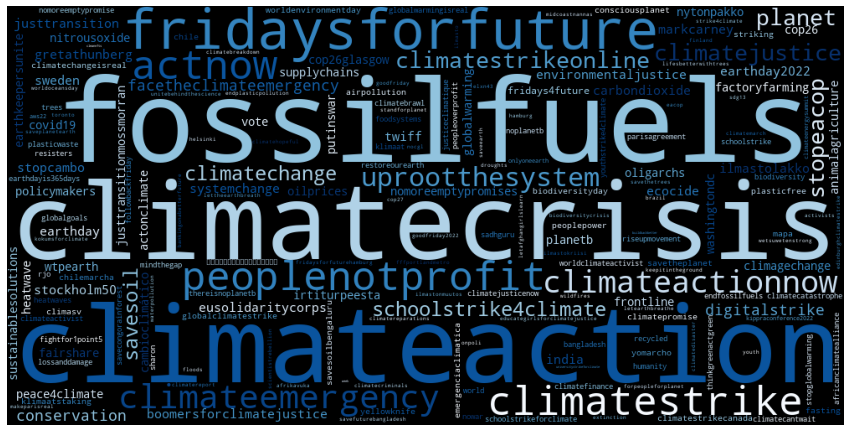

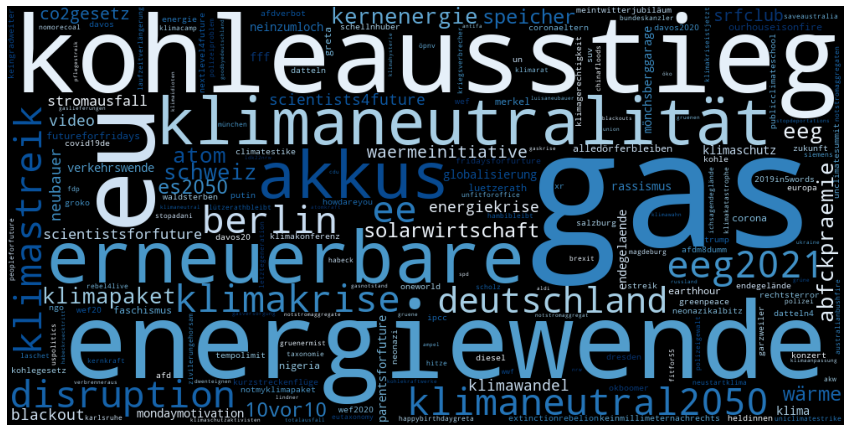

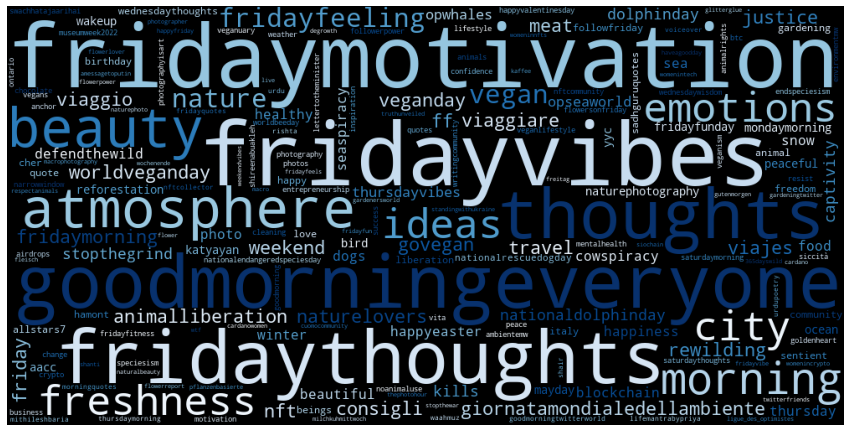

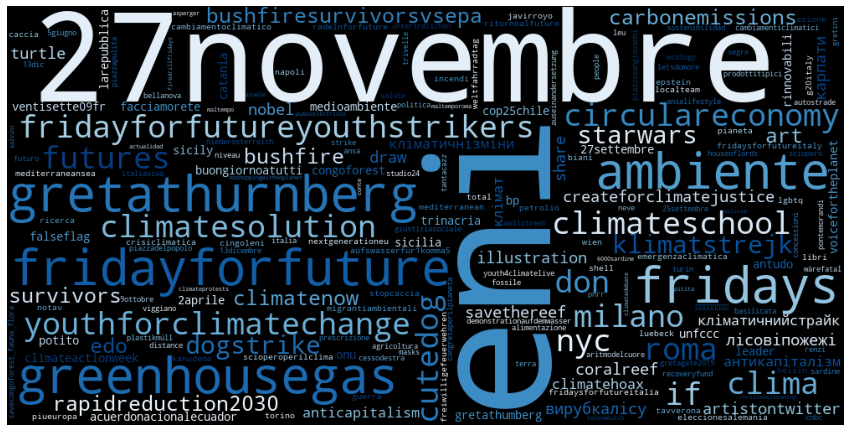

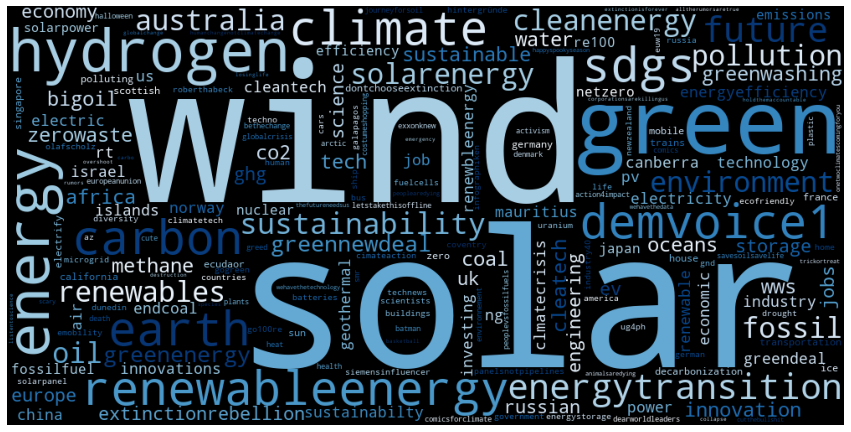

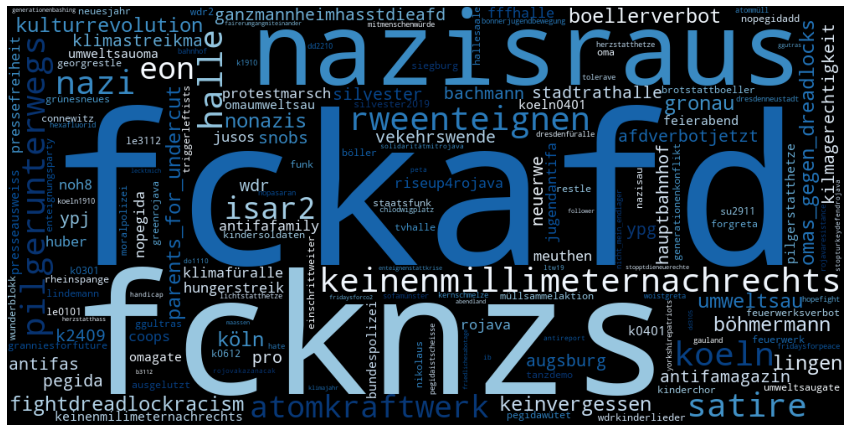

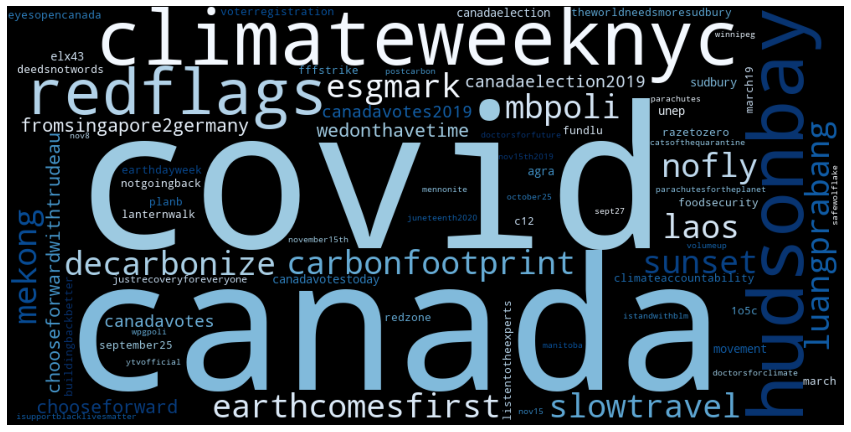

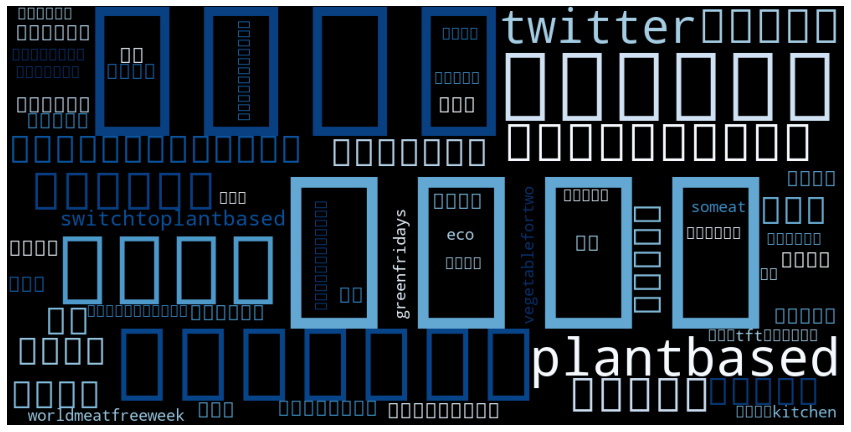

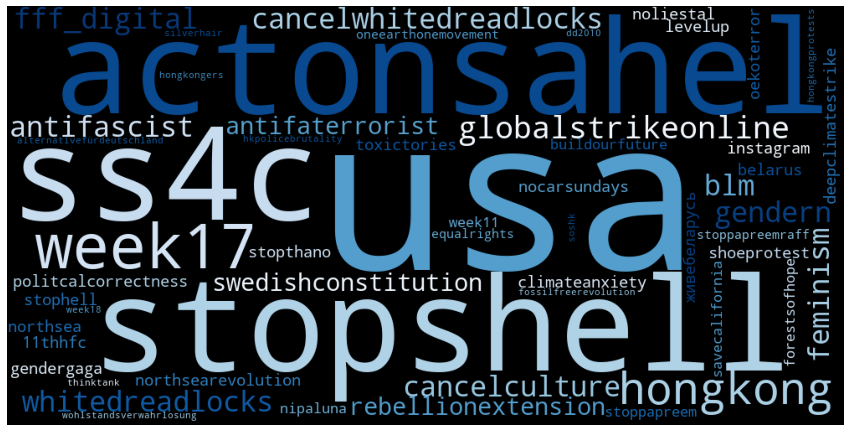

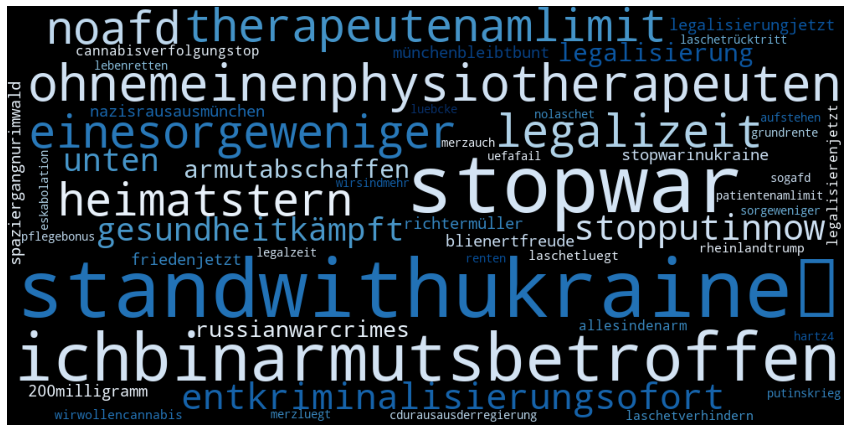

In [40]:
for i in louvain_coms.communities[:10]:
    all_string = ""
    for s in i:
        all_string = all_string + s + " "
    word_could_dict=Counter(all_string.split())
    wordcloud = WordCloud(width = 1000, height = 500 , colormap="Blues").generate_from_frequencies(word_could_dict)

    plt.figure(figsize=(15,8))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
    plt.close()